# Dataset importation

At first, we import the dataset in csv format and perform an essential exploration of its features.

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [38]:
data = pd.read_csv('CrowdstormingDataJuly1st.csv')
data.head()

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002


# Preliminary analysis -  NaN indentification

The complete description of the dataset can be found [here](https://github.com/ADAEPFL/Homework/blob/master/04%20-%20Applied%20ML/DATA.md). Since our purpose is to train a ML model to predict the skin colour from the player's description, we perform an essential qualitative analysis to understand the features of the dataset.
Above all, we take a look at the skin colour distribution, which is described by the attributes *rater1* and *rater2*.

In [39]:
# NaN identification
nans = [data.rater1.isnull().value_counts(),data.rater2.isnull().value_counts() ]
nans

[False    124621
 True      21407
 Name: rater1, dtype: int64, False    124621
 True      21407
 Name: rater2, dtype: int64]

There is a proportion of **14.7%** of NaN values. We notice that the NaN values affect the same players both for the attribute *rater1* and for *rater2*:

In [40]:
(data.rater1.isnull()==data.rater2.isnull()).value_counts()

True    146028
dtype: int64

Therefore, there are players for which the attribute *skin color* cannot be predicted directly from the dataset. Since this is the feature we want to study, we throw away the missing values:

In [41]:
data.dropna(axis=0, subset=['rater1'],inplace=True)

Now we save the cleaned dataset into csv format for further analysis:

In [42]:
data.to_csv('Cleaned_CSDJ.csv')

# Preliminary analysis - qualitative overview

We take a look at the distribution of the parameter *skin color*, described by the two attributes *rater 1* and *rater2*. The rating is expressed into a 0-to-1 grade, quantized in 5 levels from "*very light skin*" (0.0) to "*very dark skin*" (1.0).

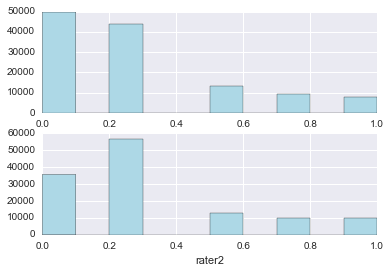

In [44]:
plt.subplot(2,1,1)
plt.hist(data.rater1,color='lightblue')
plt.xlabel('rater1')
plt.subplot(2,1,2)
plt.hist(data.rater2,color='lightblue')
plt.xlabel('rater2')

The two ratings are actually different, due to a subjective evaluation of the skin color. We plot now their difference:

(array([ 95714.,      0.,      0.,      0.,      0.,  28743.,      0.,
             0.,      0.,    164.]),
 array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
         0.45,  0.5 ]),
 <a list of 10 Patch objects>)

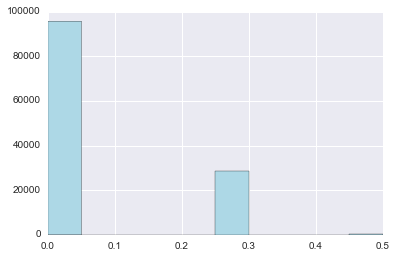

In [47]:
plt.hist(abs(data.rater2-data.rater1),color='lightblue',bins=10)

As it appears from the histogram, there are 3 observed values (0, 0.25 and 0.5) for the rating's difference in absolute value (which of course depends on the quantization of the skin color into categories). This shows that the sensibility of the evaluators may differ for at most 0.5. The proportions of rating's differences out of the total amount of players is summed-up below:

In [53]:
abs(data.rater2-data.rater1).value_counts()/len(data)*100

0.00    76.804070
0.25    23.064331
0.50     0.131599
dtype: float64

The proportions for the signed difference are instead given by:

In [54]:
(data.rater2-data.rater1).value_counts()/len(data)*100

 0.00    76.804070
 0.25    19.121978
-0.25     3.942353
 0.50     0.131599
dtype: float64

We observe that the second rater has a systematic higher perception of the skin colour with respect to the first one. For our analysis purposes, we define a new attribute ***skinColor*** as the mean of the two evaluations. This will be the quantity we want to predict:

In [62]:
data['skinColor']=0.5*(data.rater1+data.rater2)
data.head()

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,skinColor
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696,0.375
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504,0.750
5,aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,1,0,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.125
6,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,10.11.1985,187.0,80.0,Left Fullback,1,1,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.125
7,alexander-tettey,Alexander Tettey,Norwich City,England,04.04.1986,180.0,68.0,Defensive Midfielder,1,0,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,1.000


# Machine Learning analysis

Let us now begin the real ML analysis of the dataset.